# Analyzing Simulated E-commerce Sales Data

This project generates synthetic e-commerce sales data, performs validation, computes statistics, and creates visualizations.

## Objectives
- Generate synthetic dataset (365 daily entries)
- Perform data validation
- Calculate descriptive statistics for Revenue
- Visualize monthly revenue trend
- Analyze customer rating distribution

In [8]:
# =====================================
# 1. Import Required Libraries
# =====================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# =====================================
# 2. Generate Synthetic Dataset
# =====================================

dates = pd.date_range(start='2024-01-01', periods=365, freq='D')

categories = ['Electronics', 'Clothing', 'Home Appliances']

data = pd.DataFrame({
    'Date': dates,
    'Product Category': np.random.choice(categories, size=365),
    'Units Sold': np.random.randint(1, 50, size=365),
    'Customer Rating': np.random.randint(1, 6, size=365)
})

price_per_unit = np.random.uniform(10, 200, size=365)
data['Revenue'] = data['Units Sold'] * price_per_unit

print('Sample Data:')
print(data.head())

Sample Data:
        Date Product Category  Units Sold  Customer Rating      Revenue
0 2024-01-01  Home Appliances          40                5  5775.013621
1 2024-01-02      Electronics          46                5  1793.191235
2 2024-01-03  Home Appliances          24                3  2867.874922
3 2024-01-04  Home Appliances          32                5  4008.827482
4 2024-01-05      Electronics          47                2  4257.486895


In [ ]:
# =====================================
# 3. Data Validation and Cleaning Check
# =====================================

print('\n--- Missing Values Check ---')
print(data[['Units Sold', 'Revenue']].isnull().sum())

print('\n--- Data Types ---')
print(data[['Units Sold', 'Revenue']].dtypes)


--- Missing Values Check ---
Units Sold    0
Revenue       0
dtype: int64

--- Data Types ---
Units Sold      int64
Revenue       float64
dtype: object


In [ ]:
# =====================================
# 4. Descriptive Statistics for Revenue
# =====================================

revenue_stats = {
    'Mean': data['Revenue'].mean(),
    'Median': data['Revenue'].median(),
    'Std Dev': data['Revenue'].std(),
    'Min': data['Revenue'].min(),
    'Max': data['Revenue'].max()
}

print('\n--- Revenue Descriptive Statistics ---')
for key, value in revenue_stats.items():
    print(f"{key}: {value:.2f}")


--- Revenue Descriptive Statistics ---
Mean: 2672.05
Median: 2110.32
Std Dev: 2149.35
Min: 13.75
Max: 9770.90


## ✅ Text Summary — Revenue Descriptive Statistics

- **Mean Revenue:** Represents the average daily revenue generated.
- **Median Revenue:** Indicates the middle value, helping identify skewness in data.
- **Standard Deviation:** Shows how much revenue varies from day to day.
- **Minimum Revenue:** The lowest recorded daily revenue.
- **Maximum Revenue:** The highest recorded daily revenue.

These statistics help understand central tendency and variability of sales performance.

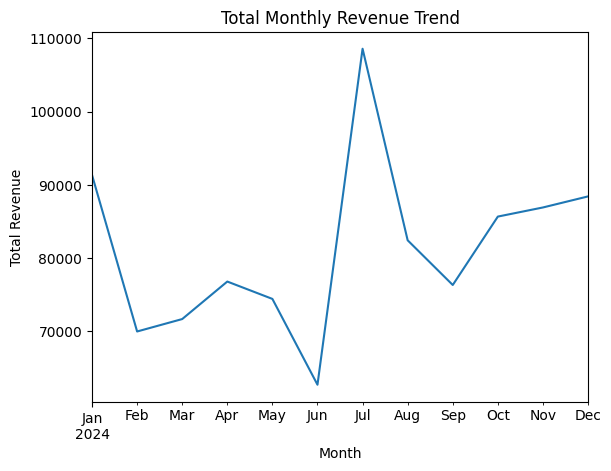

In [9]:
# =====================================
# 5. Monthly Revenue Aggregation
# =====================================

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')

monthly_revenue = data.groupby('Month')['Revenue'].sum()

plt.figure()
monthly_revenue.plot(kind='line')
plt.title('Total Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

## ✅ Insights from Monthly Revenue Trend Visualization

- Monthly revenue fluctuates due to variations in units sold and pricing.
- Peak months indicate higher demand or increased sales activity.
- Lower months may represent slower business periods.
- Trend analysis helps identify seasonality and supports forecasting and business decision-making.


--- Customer Rating Frequency ---
Customer Rating
1    74
2    73
3    77
4    62
5    79
Name: count, dtype: int64


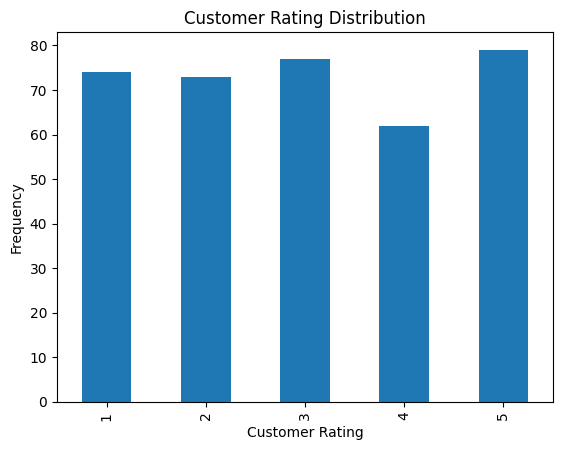

In [10]:
# =====================================
# 6. Customer Rating Frequency Distribution
# =====================================

rating_freq = data['Customer Rating'].value_counts().sort_index()

print('\n--- Customer Rating Frequency ---')
print(rating_freq)

plt.figure()
rating_freq.plot(kind='bar')
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()